In [5]:
import numpy as np

In [2]:
from DataLoad import load_to_dataframe
df, df_raw, class_dict = load_to_dataframe()

In [7]:
#from feature_generator import create_features
#features, labels = create_features(df_raw, featured_model + ".txt")

In [23]:
raw_sounds, raw_labels = np.array(df_raw['raw_sounds']), np.array(df_raw['labels'])

In [191]:
raw_sounds[0].shape

(132299,)

In [175]:
raw_sounds.reshape(-1,122299,1)

ValueError: cannot reshape array of size 6705 into shape (122299,1)

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_sounds, raw_labels, test_size=0.3)

In [176]:
src = X_train[np.newaxis, :]

In [192]:
X_train.shape

(4693, 1)

In [148]:
X_train = np.expand_dims(X_train, axis=1)

In [152]:
X_train[0]

array([array([0.02789307, 0.03193665, 0.03224182, ..., 0.04467773, 0.06698608,
       0.07931519], dtype=float32)], dtype=object)

In [126]:
a = X_train[np.newaxis, :]

In [127]:
a.shape

(1, 4693)

In [97]:
src = np.random.random((1, 44100 * 3))
src.shape

(1, 132300)

In [120]:
# Model with Kapre layers 
from kapre.time_frequency import Spectrogram, Melspectrogram
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, SpatialDropout2D
from tensorflow.keras.models import Sequential

SR = 44100

model = Sequential()
model.add(Spectrogram(n_dft=512, n_hop=256, input_shape=X_train.shape,
                      return_decibel_spectrogram=True, power_spectrogram=2.0, trainable_kernel=False, name='static_stft'))
model.add(keras.layers.Convolution2D(32, (3, 3), name='conv1', activation='relu'))
model.add(keras.layers.MaxPooling2D((25, 17)))
Dropout(0.3)
model.add(keras.layers.Convolution2D(32, (10, 10), name='conv2', activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(11, activation='softmax'))
#model.summary(line_length=80, positions=[.33, .65, .8, 1.])

AssertionError: Hey! The input is too short!

(1, 132300)

In [9]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2, )
train_gen_augm = datagen.flow(X_train, y_train)
test_gen_augm = datagen.flow(X_test, y_test)

In [19]:
from BatchGenerators import SoundSequence
batch_size = 70
train_gen = SoundSequence(X_train, y_train, batch_size)
test_gen = SoundSequence(X_test, y_test, batch_size)

In [14]:
features.shape

(6705, 128, 130, 1)

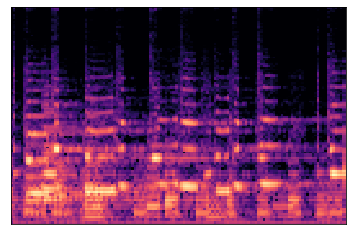

In [15]:
import librosa.display
import numpy as np
mel = features[5].squeeze()
mel_db = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel)

In [24]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
it = datagen.flow(X_train, y_train, save_to_dir)

In [31]:
obj = next(it)

In [35]:
obj[0].shape

(32, 128, 130, 1)

In [16]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, SpatialDropout2D

kernel_size = (2, 2)

model = models.Sequential()
#model.add(layers.Conv1D(1, kernel_size = 200, input_shape=(13299,1))) #
model.add(layers.Conv2D(32, kernel_size, activation="relu", input_shape=(X_train.shape[1:])))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(LSTM(64))
model.add(layers.Conv2D(64, kernel_size, activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SpatialDropout2D(0.5))
model.add(layers.Conv2D(128, kernel_size, activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SpatialDropout2D(0.5))
#model.add(layers.Dropout(0.5))
model.add(layers.Flatten())

model.add(layers.Dense(11, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 129, 32)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 63, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0

In [17]:
optimizer = 'adam'
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
epochs = 20
history = model.fit(
    train_gen,
#    steps_per_epoch=30,
    epochs=epochs,
    validation_data=test_gen,
#    validation_steps=30
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 24 steps, validate for 11 steps
Epoch 1/20
24/24 [==============================] - 42s 2s/step - loss: 19.1699 - accuracy: 0.1025 - val_loss: 2.3987 - val_accuracy: 0.1118
Epoch 2/20
24/24 [==============================] - 44s 2s/step - loss: 2.5569 - accuracy: 0.0984 - val_loss: 2.3969 - val_accuracy: 0.0855
Epoch 3/20
24/24 [==============================] - 43s 2s/step - loss: 2.4284 - accuracy: 0.1087 - val_loss: 2.3958 - val_accuracy: 0.1074
Epoch 4/20
24/24 [==============================] - 44s 2s/step - loss: 2.4043 - accuracy: 0.1068 - val_loss: 2.3947 - val_accuracy: 0.1074
Epoch 5/20
24/24 [==============================] - 44s 2s/step - loss: 2.4055 - accuracy: 0.1125 - val_loss: 2.3935 - val_accuracy: 0.1074
Epoch 6/20
24/24 [==============================] - 43s 2s/step - loss: 2.3989 - accuracy: 0.1159 - val_loss: 2.3926 - val_accuracy: 0.1074
Epoch 7/20
24/24 [==============================] - 42s 2s/step - l

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/dl/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-207711e4f71a>", line 6, in <module>
    validation_data=test_gen,
  File "/usr/local/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "/usr/local/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 342, in fit
    total_epochs=epochs)
  File "/usr/local/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 128, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "/usr/local/anaconda3/envs/dl/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2_utils.py", line 98, in execution_function
    distribut

KeyboardInterrupt: 

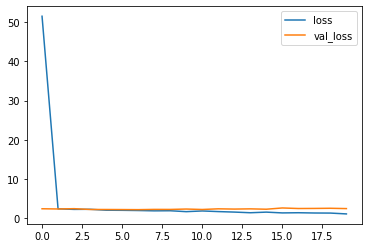

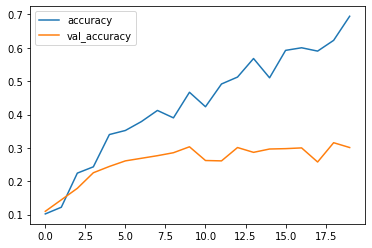

In [40]:
from PlotModel import plot_model_history
plot_model_history(model)

# model.save('saved_models/' + featured_model + ".mdl") 